![En tête general](img/En_tete_general.png)


*(C) Copyright Franck CHEVRIER 2019-2020 http://www.python-lycee.com/*

<span style="color: #9317B4"> Pour exécuter une saisie Python, sélectionner la cellule et valider avec </span><span style="color: #B317B4"><strong>SHIFT+Entrée</strong></span>.


# Méthode de Monte Carlo <span style="color: red"> (corrigé)</span> 

Dans un repère orthonormé, on considère les surfaces $C$ et $P$ définies respectivement par :

$ C=\left\{  \;M(x;y) \; /  \; 0 \leqslant x \leqslant 1  \;; \; 0 \leqslant y \leqslant 1  \; \right\} $

$ P=\left\{  \;M(x;y) \; /  \; 0 \leqslant x \leqslant 1  \;; \; 0 \leqslant y \leqslant x^2  \; \right\} $


__1. Identifier ces deux surfaces et les représenter dans le repère fourni.__

![Repère à compléter](img/Monte_Carlo_repere.png)

__Déterminer l’aire de $C$.__

<span style="color: #7C39C9">*Le but de l’activité est de déterminer des valeurs approchées de l’aire de la surface $P$ à l’aide d’une méthode probabiliste.*</span>

<span style="color: #7C39C9">*On admet que lorsqu’on tire aléatoirement un point dans $C$, la probabilité qu’il soit dans $P$ vaut $\displaystyle \frac{Aire(P)}{Aire(C)} $.*</span> 

<span style="color: #7C39C9">*Ainsi, lorsqu’on tire aléatoirement plusieurs points dans $C$, la fréquence de ces points qui sont dans $P$ fournit une valeur approchée de $\displaystyle \frac{Aire(P)}{Aire(C)} $, d’autant plus précise que le nombre de points est grand.*</span>

<span style="color: #7C39C9"><strong> Pour une présentation de la méthode, voir la vidéo suivante.</strong></span>

<video controls src="video/Monte_Carlo.mp4" width="960" height="540" />

__2. Tester puis modifier la fonction MonteCarlo donnée ci-dessous pour qu’elle reçoive un entier $n$ en argument et place $n$ points aléatoires de $C$ sur le graphique.__


In [1]:
# Modifier la fonction

from random import random          # import de la fonction pour gérer l'aléatoire
import matplotlib.pyplot as plt    # import des fonctionnalités graphiques

def MonteCarlo(n):
    
    # répétition n fois
    for k in range(n):
        # generation de coordonnees aleatoires entre 0 et 1 pour un point M dans C
        x,y=random(),random()    
        # placement du point M dans le repere (en bleu)
        plt.scatter(x,y,color='blue')     
    
    # reglage des bornes des axes du repere
    plt.axis([0,1,0,1]) 
    # ouverture de la fenetre graphique et affichage
    plt.show() 
    
    return None

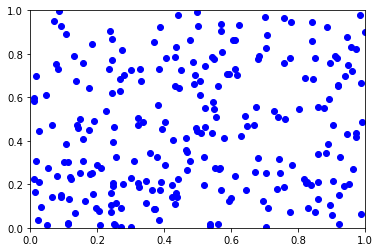

In [2]:
# Tester la fonction
MonteCarlo(250)

__3. Créer une fonction dans_P qui reçoit en argument les coordonnées $(x;y)$ d’un point de $C$ et renvoie True si ce point appartient à $P$ et False sinon.__
	

In [3]:
def dans_P(x,y):
    return y<=x**2

__4. Modifier la fonction MonteCarlo pour qu’elle place les points appartenant à $P$ en rouge et les autres en bleu. On utilisera la fonction dans_P pour le test.__


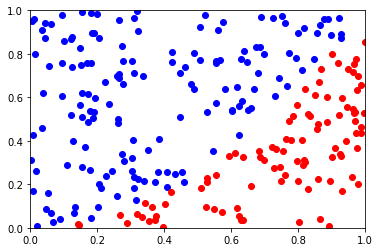

In [4]:
def MonteCarlo_2(n):
       
    for k in range(n):
        # generation de coordonnees aleatoires entre 0 et 1 pour un point M dans C
        x,y=random(),random()    
        
        if dans_P(x,y):
            # placement du point M dans le repere (en rouge)
            plt.scatter(x,y,color='red')     
            
        else:
            # placement du point M dans le repere (en bleu)
            plt.scatter(x,y,color='blue')      

    # reglage des bornes des axes du repere
    plt.axis([0,1,0,1]) 
    # ouverture de la fenetre graphique et affichage
    plt.show() 
    
    return None

MonteCarlo_2(250)

__5. Modifier la fonction MonteCarlo pour :__
* __qu’elle compte le nombre de points placés qui sont dans $P$ ;__
* __qu’elle calcule la fréquence $f$ de ces points ;__
* __qu’elle renvoie cette fréquence $f$.__


<span style="color: #888888">*On pourra également faire apparaître cette fréquence dans la fenêtre à l’aide de l’instruction suivante :* plt.text(0,-0.1,"Fréquence des points dans P: "+str(f))*.*</span>


In [5]:
def MonteCarlo_3(n):
    
    # initialisation du compteur de points dans P
    compteur=0
    
    for k in range(n):
        # generation de coordonnees aleatoires entre 0 et 1 pour un point M dans C
        x,y=random(),random()    
        
        if dans_P(x,y):
            # placement du point M dans le repere (en rouge)
            plt.scatter(x,y,color='red')     
            # incrementation du compteur
            compteur = compteur+1
        else:
            # placement du point M dans le repere (en bleu)
            plt.scatter(x,y,color='blue') 
        
    # calcul de la fréquence de points dans P
    f=compteur/n
    # affichage de la frequence dans la fenetre       
    plt.text(0,-0.2,"Fréquence des points dans C: "+str(f))
    
    # reglage des bornes des axes du repere
    #
    plt.axis('equal')
    plt.axis([0,1,0,1]) 
    # ouverture de la fenetre graphique et affichage
    plt.show() 
        
    return f

__6. En appelant la fonction MonteCarlo avec $n=100$ ; $n=1000$ ; $n=10000$ … donner des approximations de l’aire de la surface $P$.__

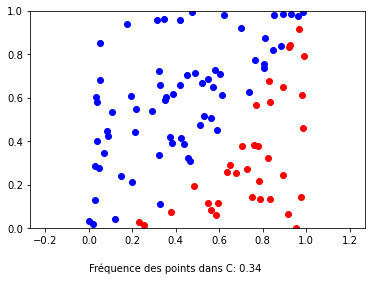

0.34

In [6]:
MonteCarlo_3(100)


__7. On considère la surface $ D=\left\{  \;M(x;y) \; /  \; 0 \leqslant x \leqslant 1  \;; \; 0 \leqslant y \leqslant 1  \;; \; x²+y² \leqslant 1  \; \right\} $.__

__Identifier cette surface $D$, et représenter $C$ et $D$ dans le repère fourni.__

![Repère à compléter](img/Monte_Carlo_repere.png)

__Déterminer la valeur exacte de l’aire de $D$.__



__Adapter la méthode vue précédemment pour obtenir des approximations de $\pi$ par la méthode de Monte-Carlo.__ 

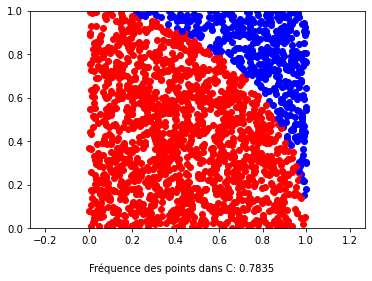

3.134

In [7]:
#redéfinition de P
def dans_P(x,y):
    return x**2+y**2<=1


approx_pi=4*MonteCarlo_3(2000)

approx_pi

*(C) Copyright Franck CHEVRIER 2019-2020 http://www.python-lycee.com/*
